In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
churn_data = pd.read_csv('Customer_Churn.csv')

In [27]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [80]:
churn_Data3 = pd.read_csv('Customer_Churn.csv')

In [4]:
churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### DATA PREPROCESSING

In [5]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
churn_data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### One Hot Encoding

In [12]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes':1,'No':0})


In [13]:
churn_data = pd.get_dummies(churn_data, drop_first=True)

In [25]:
churn_data2 = churn_data

In [28]:
columns_to_encode = ['Partner', 'StreamingMovies', 'Dependents','PhoneService','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling']  # replace with your actual columns
churn_data[columns_to_encode] = churn_data[columns_to_encode].applymap(lambda x: 1 if x == 'Yes' else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_17196\2635899361.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  churn_data[columns_to_encode] = churn_data[columns_to_encode].applymap(lambda x: 1 if x == 'Yes' else 0)


In [29]:
columns_to_encode = ['Churn']  # replace with your actual columns
churn_data[columns_to_encode] = churn_data[columns_to_encode].applymap(lambda x: 1 if x == 'Yes' else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_17196\3150703376.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  churn_data[columns_to_encode] = churn_data[columns_to_encode].applymap(lambda x: 1 if x == 'Yes' else 0)


In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
churn_data['InternetService'] = encoder.fit_transform(churn_data['InternetService'])  
print(encoder.classes_)  


['DSL' 'Fiber optic' 'No']


In [31]:
encoder = LabelEncoder()
churn_data['gender'] = encoder.fit_transform(churn_data['gender'])  
print(encoder.classes_)  


['Female' 'Male']


In [43]:
encoder = LabelEncoder()
churn_data['OnlineBackup'] = encoder.fit_transform(churn_data['OnlineBackup'])  
print(encoder.classes_)  


['No' 'No internet service' 'Yes']


In [33]:
encoder = LabelEncoder()
churn_data['PaymentMethod'] = encoder.fit_transform(churn_data['PaymentMethod'])  
print(encoder.classes_)  


['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [34]:
encoder = LabelEncoder()
churn_data['MultipleLines'] = encoder.fit_transform(churn_data['MultipleLines'])  
print(encoder.classes_)  


['No' 'No phone service' 'Yes']


### FINDING CORRELATION

In [35]:
churn_data.columns = churn_data.columns.str.strip()

In [36]:
churn_data = churn_data.drop('customerID', axis=1)

In [37]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,No,Yes,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,Yes,No,1,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,Yes,Yes,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,Yes,No,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,No,No,0,0,0,0,0,1,2,70.70,151.65,1


In [38]:
for col in churn_data.columns:
    if churn_data[col].dtype == object:
        # check if can be converted to numeric
        try:
            pd.to_numeric(churn_data[col])
        except ValueError as e:
            print(f"{col} cannot be fully converted:\n{e}\n")


OnlineSecurity cannot be fully converted:
Unable to parse string "No" at position 0

OnlineBackup cannot be fully converted:
Unable to parse string "Yes" at position 0

TotalCharges cannot be fully converted:
Unable to parse string " " at position 488



In [39]:
churn_data['TotalCharges'] = (
    churn_data['TotalCharges']
    .replace(r'^\s*$', '0', regex=True)  # replaces empty/whitespace strings
    .astype(float)                       # converts to float
)

In [41]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,No,Yes,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,Yes,No,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,Yes,Yes,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,Yes,No,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,No,No,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,Yes,No,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,No,Yes,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,Yes,No,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,No,No,0,0,0,0,0,1,3,74.40,306.60,1


In [44]:
correlations = churn_data.corr()['Churn'].drop('Churn') #corr amongst the data points dependent variable depends on
most_correlated = correlations.abs().sort_values(ascending=False)
print("Most correlated variables with Churn:\n", most_correlated)

Most correlated variables with Churn:
 Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TotalCharges        0.198324
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
TechSupport         0.164674
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
DeviceProtection    0.066160
StreamingTV         0.063228
StreamingMovies     0.061382
InternetService     0.047291
MultipleLines       0.038037
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


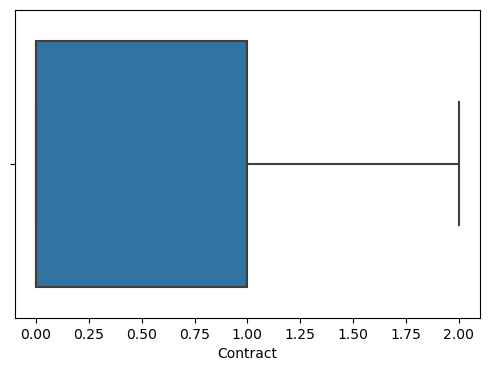

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=churn_data['Contract'])
plt.show()

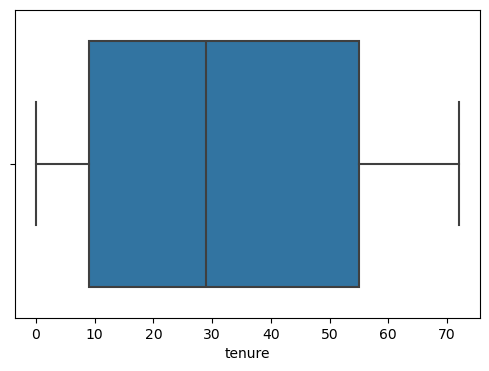

In [63]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=churn_data['tenure'])
plt.show()

In [65]:
X = churn_data.drop('Churn',axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Results:
[[882 154]
 [179 194]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.56      0.52      0.54       373

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409



### DATA ANALYSIS

### Univariate analysis

In [82]:
sns.set(style="darkgrid")

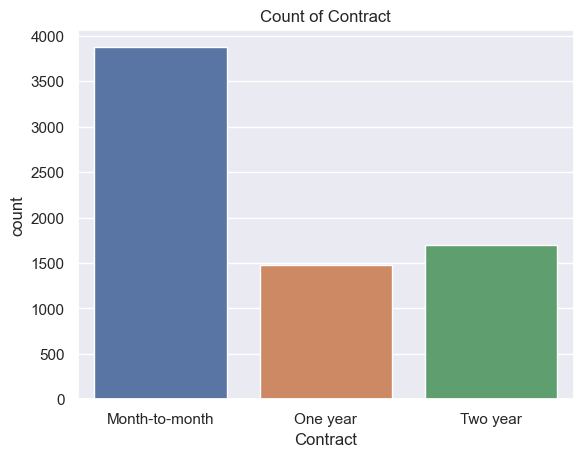

In [83]:
sns.countplot(data=churn_Data3, x='Contract')
plt.title('Count of Contract')
plt.show()

In [87]:
churn_Data3['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

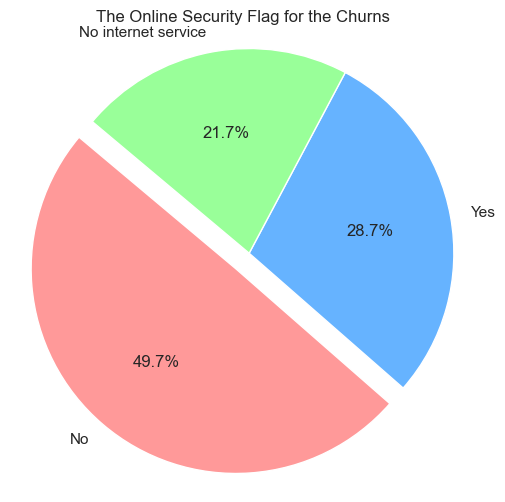

In [89]:
species_counts = churn_Data3['OnlineSecurity'].value_counts()

# Labels and sizes
labels = species_counts.index
sizes = species_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # To highlight the first slice

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=140)
plt.title("The Online Security Flag for the Churns")
plt.axis('equal')
plt.show()

In [91]:
churn_Data3['TotalCharges'] = (churn_data['TotalCharges']
    .replace(r'^\s*$', '0', regex=True) 
    .astype(float))                      

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


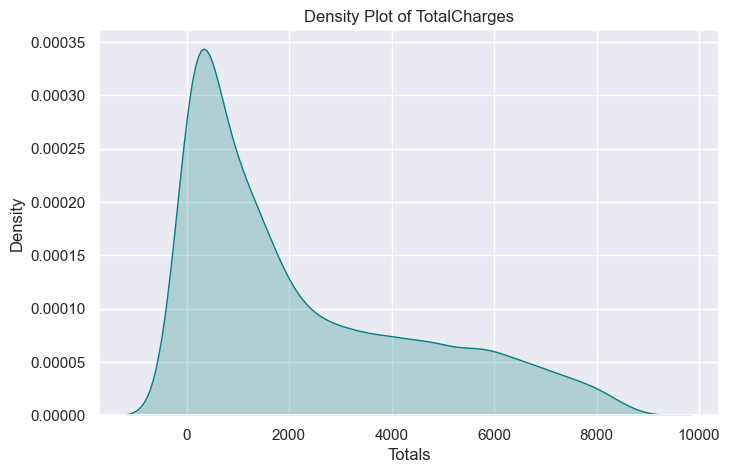

In [92]:
plt.figure(figsize=(8, 5))
sns.kdeplot(churn_Data3['TotalCharges'], fill=True, color='teal')
plt.title('Density Plot of TotalCharges')
plt.xlabel('Totals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Bivariate Analysis

In [96]:
crosstab = pd.crosstab(churn_Data3['InternetService'], churn_Data3['Churn'], normalize='index')

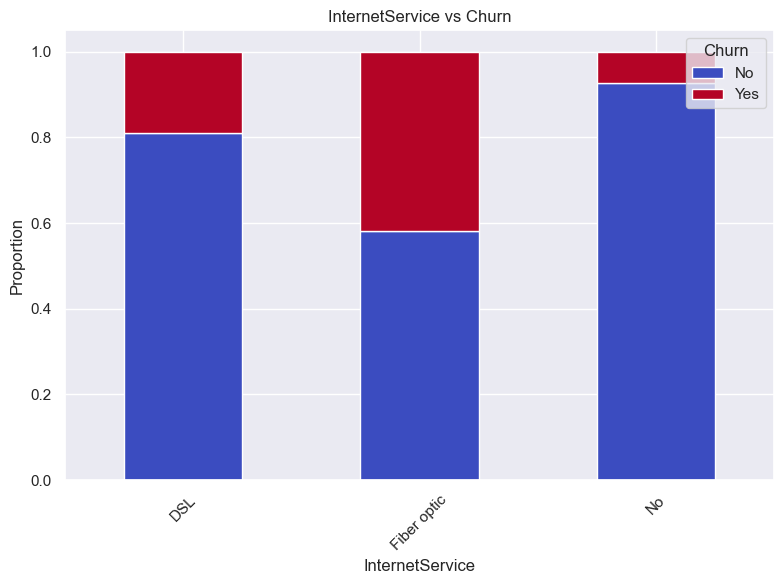

In [97]:
crosstab.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Proportion')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

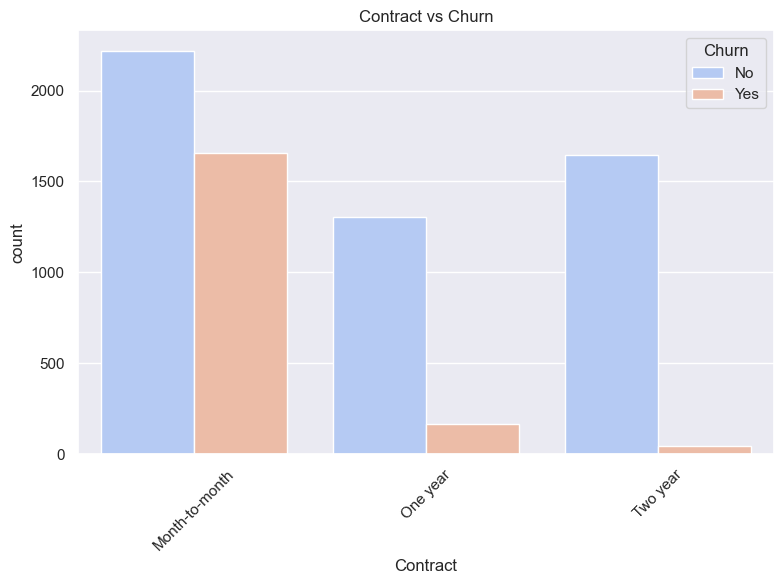

In [100]:
plt.figure(figsize=(8,6))
sns.countplot(data=churn_Data3, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Contract vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


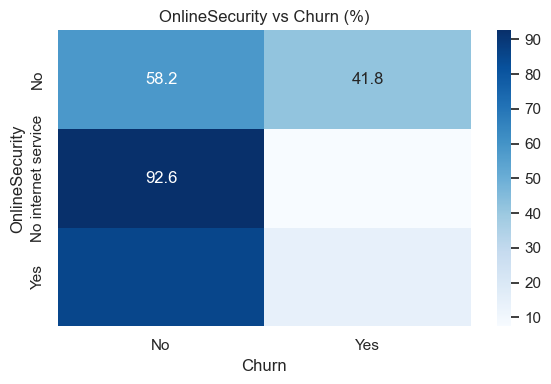

In [102]:
crosstab_perc = pd.crosstab(churn_Data3['OnlineSecurity'], churn_Data3['Churn'], normalize='index')*100

plt.figure(figsize=(6,4))
sns.heatmap(crosstab_perc, annot=True, cmap='Blues', fmt=".1f")
plt.title('OnlineSecurity vs Churn (%)')
plt.ylabel('OnlineSecurity')
plt.xlabel('Churn')
plt.tight_layout()
plt.show()


### MultiVariate Analysis

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


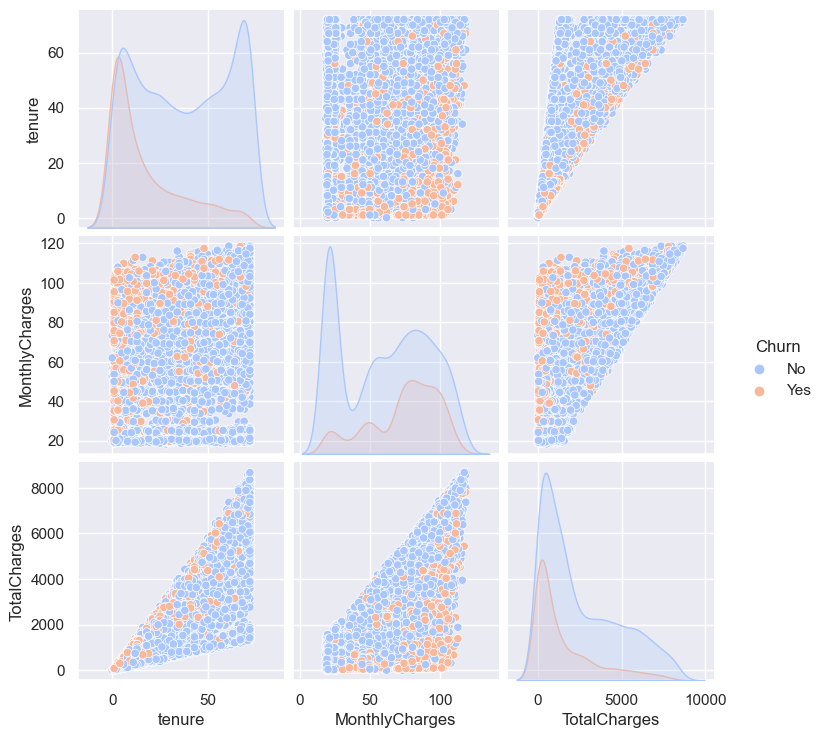

In [104]:
sns.pairplot(churn_Data3, hue='Churn', vars=['tenure','MonthlyCharges','TotalCharges'], palette='coolwarm')
plt.show()

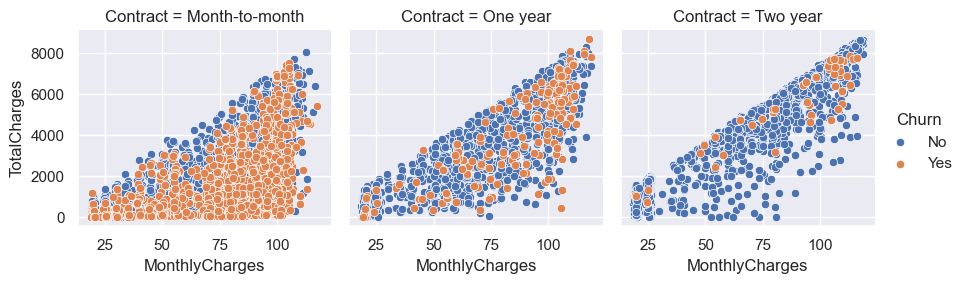

In [106]:
g = sns.FacetGrid(churn_Data3, col='Contract', hue='Churn')
g.map(sns.scatterplot, 'MonthlyCharges', 'TotalCharges')
g.add_legend()
plt.show()

### APPLYING NEURAL NETWORKS TO CHURN DATASET

### Scaling

In [45]:
X = churn_data.drop('Churn',axis=1)
y = churn_data['Churn']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
### Building Neural Network

In [50]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model = Sequential([Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),BatchNormalization(),Dropout(0.3),Dense(32, activation='relu'),BatchNormalization(),Dropout(0.3),
    Dense(1, activation='sigmoid')])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Precision', 'Recall'])


In [61]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

In [62]:
history = model.fit( X_train_scaled, y_train,validation_split=0.2,epochs=160, batch_size=32,class_weight={0: 1, 1: (len(y)/sum(y))},  # optional if imbalanced
    callbacks=[early_stopping, reduce_lr],verbose=1)

model.evaluate(X_test_scaled, y_test)

Epoch 1/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - AUC: 0.6630 - Precision: 0.3698 - Recall: 0.6962 - accuracy: 0.5899 - loss: 1.3065 - val_AUC: 0.8119 - val_Precision: 0.4085 - val_Recall: 0.8505 - val_accuracy: 0.6557 - val_loss: 0.6205 - learning_rate: 0.0010
Epoch 2/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7807 - Precision: 0.4427 - Recall: 0.8171 - accuracy: 0.6742 - loss: 1.0118 - val_AUC: 0.8241 - val_Precision: 0.4301 - val_Recall: 0.8327 - val_accuracy: 0.6832 - val_loss: 0.5789 - learning_rate: 0.0010
Epoch 3/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7886 - Precision: 0.4412 - Recall: 0.8082 - accuracy: 0.6676 - loss: 0.9650 - val_AUC: 0.8299 - val_Precision: 0.4438 - val_Recall: 0.8292 - val_accuracy: 0.6983 - val_loss: 0.5719 - learning_rate: 0.0010
Epoch 4/160
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7988 - Precision: 0.4616 - Recall: 0.8188 - accuracy: 0.6871 - loss: 0.9556 - val_AUC: 0.8314 - val_Precision: 0.4327 - val_Recall: 0.847

[0.5430706143379211,
 0.7154009938240051,
 0.8560404777526855,
 0.47922849655151367,
 0.8659517168998718]

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting on the test set
y_pred_probs = model.predict(X_test_scaled)          # these are probabilities
y_pred = (y_pred_probs > 0.5).astype(int).ravel()    # threshold to get class labels

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [64]:
# Printing Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.7154


In [65]:
# Printing first 10 Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nActual vs Predicted (first 10):")
print(comparison_df.head(10))


Actual vs Predicted (first 10):
   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       0          0
5       1          1
6       0          0
7       0          0
8       1          0
9       1          1


### Visualising actual vs predicted

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


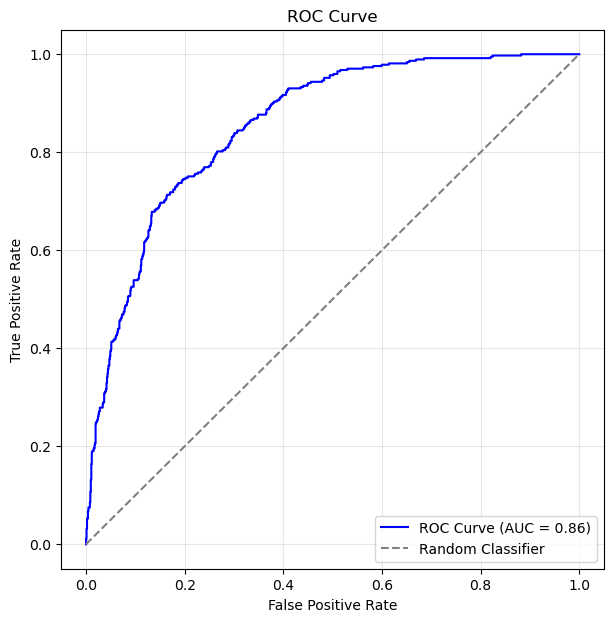

AUC: 0.8560


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

# Geting predicted probabilities
y_pred_probs = model.predict(X_test_scaled).ravel()

# Computing ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"AUC: {auc_score:.4f}")


# Intuition

It means that the Area under the cure is .85, which indicates that 85% of the randomly picked churn data will be rightly predicted